In [42]:
import matplotlib.pyplot as plt      #시각화를 위한 설치
import matplotlib.font_manager as fm    # 한글 폰트
import matplotlib                   #시각화를 위한 설치
import os, warnings  
import pandas as pd                #구조 변경 및 결합을 하기 위한 설치
import seaborn as sns              #시각화를 위한 설치
import plotly.express as px        #시각화를 위한 설치

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)         #모든 행을 다 보여주라는 명령
pd.set_option('display.max_columns', None)      #모든 열을 다 보여주라는 명령

In [43]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False
## 한글 폰트 적용 ( 안하면 한글 깨짐 )
f_name = fm.FontProperties(fname="C:/Windows/Fonts/malgunbd.ttf").get_name()
plt.rc('font', family=f_name)

In [44]:
airpollution_2019= pd.read_csv('airpollution_2019.csv',encoding='ANSI')
airpollution_2020= pd.read_csv('airpollution_2020.csv',encoding='ANSI')

In [45]:
airpollution_2019=airpollution_2019.loc[airpollution_2019['측정소명']=='강남구']
airpollution_2020=airpollution_2020.loc[airpollution_2020['측정소명']=='강남구']

In [46]:
airpollution_2019=airpollution_2019.loc[:,['측정일시','미세먼지(㎍/㎥)']]
airpollution_2020=airpollution_2020.loc[:,['측정일시','미세먼지(㎍/㎥)']]

In [47]:
airpollution_2019.columns=['측정일시','미세먼지']
airpollution_2020.columns=['측정일시','미세먼지']

In [48]:
airpollution_2019['측정일시']=airpollution_2019['측정일시'].astype('str')
airpollution_2020['측정일시']=airpollution_2020['측정일시'].astype('str')

In [49]:
airpollution_2019['측정일시']=pd.to_datetime(airpollution_2019['측정일시'])
airpollution_2020['측정일시']=pd.to_datetime(airpollution_2020['측정일시'])

<AxesSubplot:xlabel='측정일시', ylabel='미세먼지'>

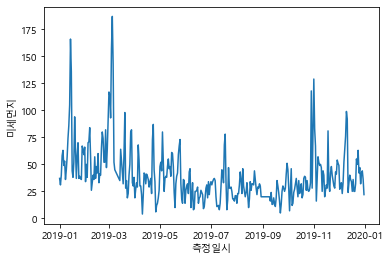

In [50]:
sns.lineplot(x='측정일시',y='미세먼지',data=airpollution_2019)

In [51]:
airpollution_2019.index=airpollution_2019['측정일시']
airpollution_2019.set_index('측정일시',inplace=True)

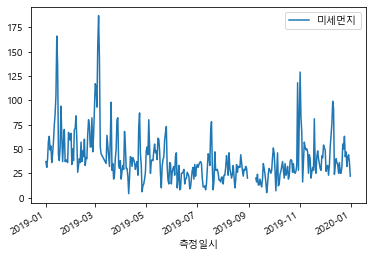

In [52]:
airpollution_2019.plot()
plt.show()

In [53]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [54]:
airpollution_2019=airpollution_2019.dropna()

In [55]:
airpollution_2019.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 349 entries, 2019-01-01 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   미세먼지    349 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


In [56]:
#ARIMA모델 학습

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

#(ar=2,차분=1, ma=2)파라미터로 arima모델을 학습
model=ARIMA(airpollution_2019['미세먼지'], order=(0,1,1))
model_fit=model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.미세먼지   No. Observations:                  348
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1534.889
Method:                       css-mle   S.D. of innovations             19.916
Date:                Fri, 15 Oct 2021   AIC                           3073.779
Time:                        16:55:19   BIC                           3081.483
Sample:                             1   HQIC                          3076.846
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ma.L1.D.미세먼지    -0.2778      0.087     -3.210      0.001      -0.447      -0.108
                                    Roots                                    
                  Real          Imaginary      

<AxesSubplot:xlabel='측정일시'>

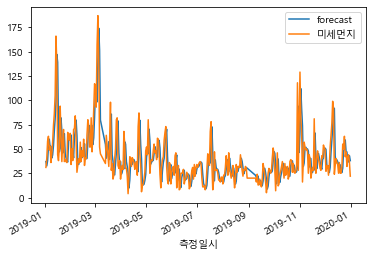

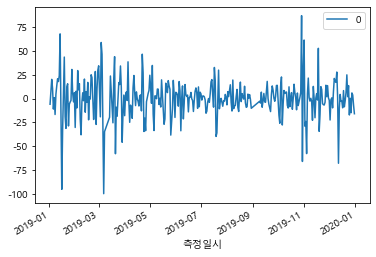

In [57]:
fig=model_fit.plot_predict()
residuals=pd.DataFrame(model_fit.resid)
residuals.plot()

In [34]:
fore = model_fit.forecast(steps=2)
print(fore)

(array([29.74054964, 29.74054964]), array([18.46077164, 22.30744224]), array([[ -6.44189789,  65.92299718],
       [-13.98123373,  73.46233301]]))


In [58]:
airpollution_2020.index=airpollution_2020['측정일시']
airpollution_2020.set_index('측정일시',inplace=True)

In [59]:
airpollution_2020_10=airpollution_2020.head(10)

In [61]:
forecast_data=model_fit.forecast(steps=10) #학습데이터 셋으로 부터 5일 뒤를 예측

pred_y=forecast_data[0].tolist()
test_y=airpollution_2020_10.미세먼지.values #실제 5일의 미세먼지 데이터

In [63]:
forecast_data

(array([26.42900233, 26.42900233, 26.42900233, 26.42900233, 26.42900233,
        26.42900233, 26.42900233, 26.42900233, 26.42900233, 26.42900233]),
 array([19.91647693, 24.56729479, 28.46819091, 31.89551401, 34.98870866,
        37.82982492, 40.47198505, 42.95192073, 45.29628477, 47.52514423]),
 array([[-12.60657516,  65.46457982],
        [-21.72201067,  74.58001532],
        [-29.36762656,  82.22563121],
        [-36.08505639,  88.94306105],
        [-42.14760651,  95.00561117],
        [-47.71609207, 100.57409672],
        [-52.89463075, 105.75263541],
        [-57.75521536, 110.61322002],
        [-62.35008446, 115.20808911],
        [-66.71856872, 119.57657338]]))

In [64]:
airpollution_2020=airpollution_2020.head(5)

In [65]:
test_y

array([30., 56., 61., 54., 45., 38.,  6., 20., 46., 58.])

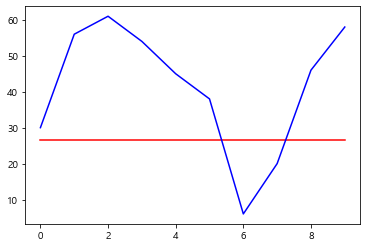

In [66]:
plt.plot(pred_y,color='red')
plt.plot(test_y,color='blue')

In [399]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [400]:
import warnings
warnings.filterwarnings('ignore')

for param in pdq:
    try:
        model_arima=ARIMA(airpollution_2019.미세먼지.values, order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 3247.979165065265
(0, 0, 1) 3078.3525048452348
(0, 0, 2) 3056.625040977222
(0, 0, 3) 3042.9172533257242
(0, 0, 4) 3043.1539189628156
(0, 1, 0) 3084.4771852067215
(0, 1, 1) 3075.7771208110626
(0, 1, 2) 3025.7958942698942
(0, 1, 3) 3022.047209328455
(0, 1, 4) 3018.2681739203285
(0, 2, 0) 3354.4625081777826
(0, 2, 1) 3084.4664435845325
(0, 2, 2) 3076.4287994285155
(0, 2, 3) 3028.966493277021
(0, 2, 4) 3026.8865057308813
(1, 0, 0) 3034.2924431499187
(1, 0, 1) 3034.612507515294
(1, 0, 2) 3026.791033740674
(1, 0, 3) 3027.4000572926684
(1, 1, 0) 3081.9027723644986
(1, 1, 1) 3021.7063465443316
(1, 1, 2) 3017.5417034713637
(1, 1, 3) 3018.046690711616
(1, 1, 4) 3018.921978577271
(1, 2, 0) 3283.097448339361
(2, 0, 0) 3035.2755828707186
(2, 0, 1) 3030.5087709951435
(2, 0, 2) 3025.689472219957
(2, 0, 3) 3030.7693521987158
(2, 0, 4) 3026.2929259863945
(2, 1, 0) 3057.4139618600984
(2, 1, 1) 3019.084261922959
(2, 1, 2) 3015.7368926778868
(2, 1, 3) 3017.6739389770773
(2, 1, 4) 3020.0059329323

#  [Facebook Prophet활용하기]

In [53]:
from fbprophet import Prophet

In [54]:
airpollution_2019.columns=['ds','y']
airpollution_2020.columns=['ds','y']

In [55]:
airpollution_2019.head()

,ds,y
0,2019-01-01,37.0
46,2019-01-02,31.0
92,2019-01-03,40.0
138,2019-01-04,58.0
184,2019-01-05,63.0


In [56]:
airpollution_2019=airpollution_2019.reset_index(drop=True)

In [57]:
airpollution_2019['ds']=airpollution_2019['ds'].astype('str')
airpollution_2020['ds']=airpollution_2020['ds'].astype('str')

In [58]:
airpollution_2019['ds']=pd.to_datetime(airpollution_2019['ds'])
airpollution_2020['ds']=pd.to_datetime(airpollution_2020['ds'])

In [59]:
airpollution_2019

,ds,y
0,2019-01-01,37.0
1,2019-01-02,31.0
2,2019-01-03,40.0
3,2019-01-04,58.0
4,2019-01-05,63.0
5,2019-01-06,49.0
6,2019-01-07,53.0
7,2019-01-08,36.0
8,2019-01-09,45.0
9,2019-01-10,57.0


In [60]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)
prophet.fit(airpollution_2019)

In [61]:
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
356,2020-01-01,44.079263,20.203340,70.155836
357,2020-01-02,41.450827,16.233512,65.893229
358,2020-01-03,43.243476,17.696585,65.992108
359,2020-01-04,47.699968,25.253430,72.011499
360,2020-01-05,45.539670,19.370422,71.052404


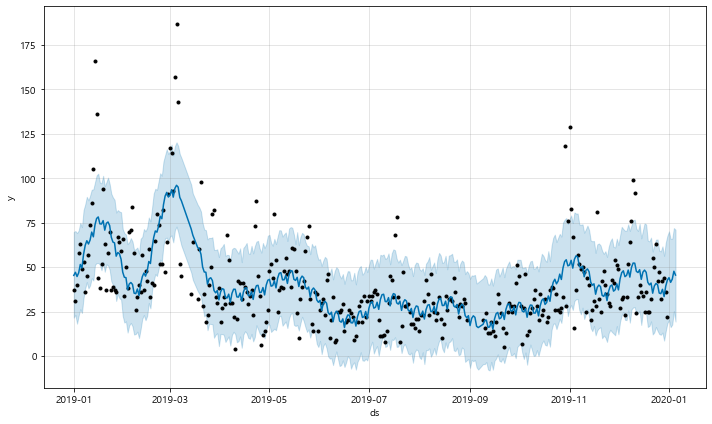

In [62]:
fig1=prophet.plot(forecast_data)

In [63]:
airpollution_2020_5

,측정일시,미세먼지
0,2020-01-01,30.0
45,2020-01-02,56.0
90,2020-01-03,61.0
135,2020-01-04,54.0
180,2020-01-05,45.0
225,2020-01-06,38.0
274,2020-01-07,6.0
324,2020-01-08,20.0
374,2020-01-09,46.0
424,2020-01-10,58.0


In [64]:
airpollution_2020=airpollution_2020.reset_index(drop=True)

In [68]:
airpollution_2020_30=airpollution_2020.head(30)

In [69]:
pred_y=forecast_data.yhat.values[-30:]
test_y=airpollution_2020.y.values

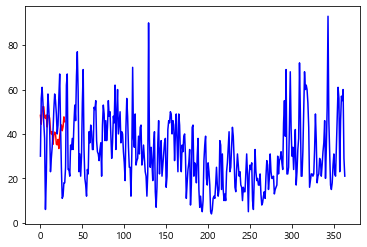

In [70]:
plt.plot(pred_y,color='red')
plt.plot(test_y,color='blue')